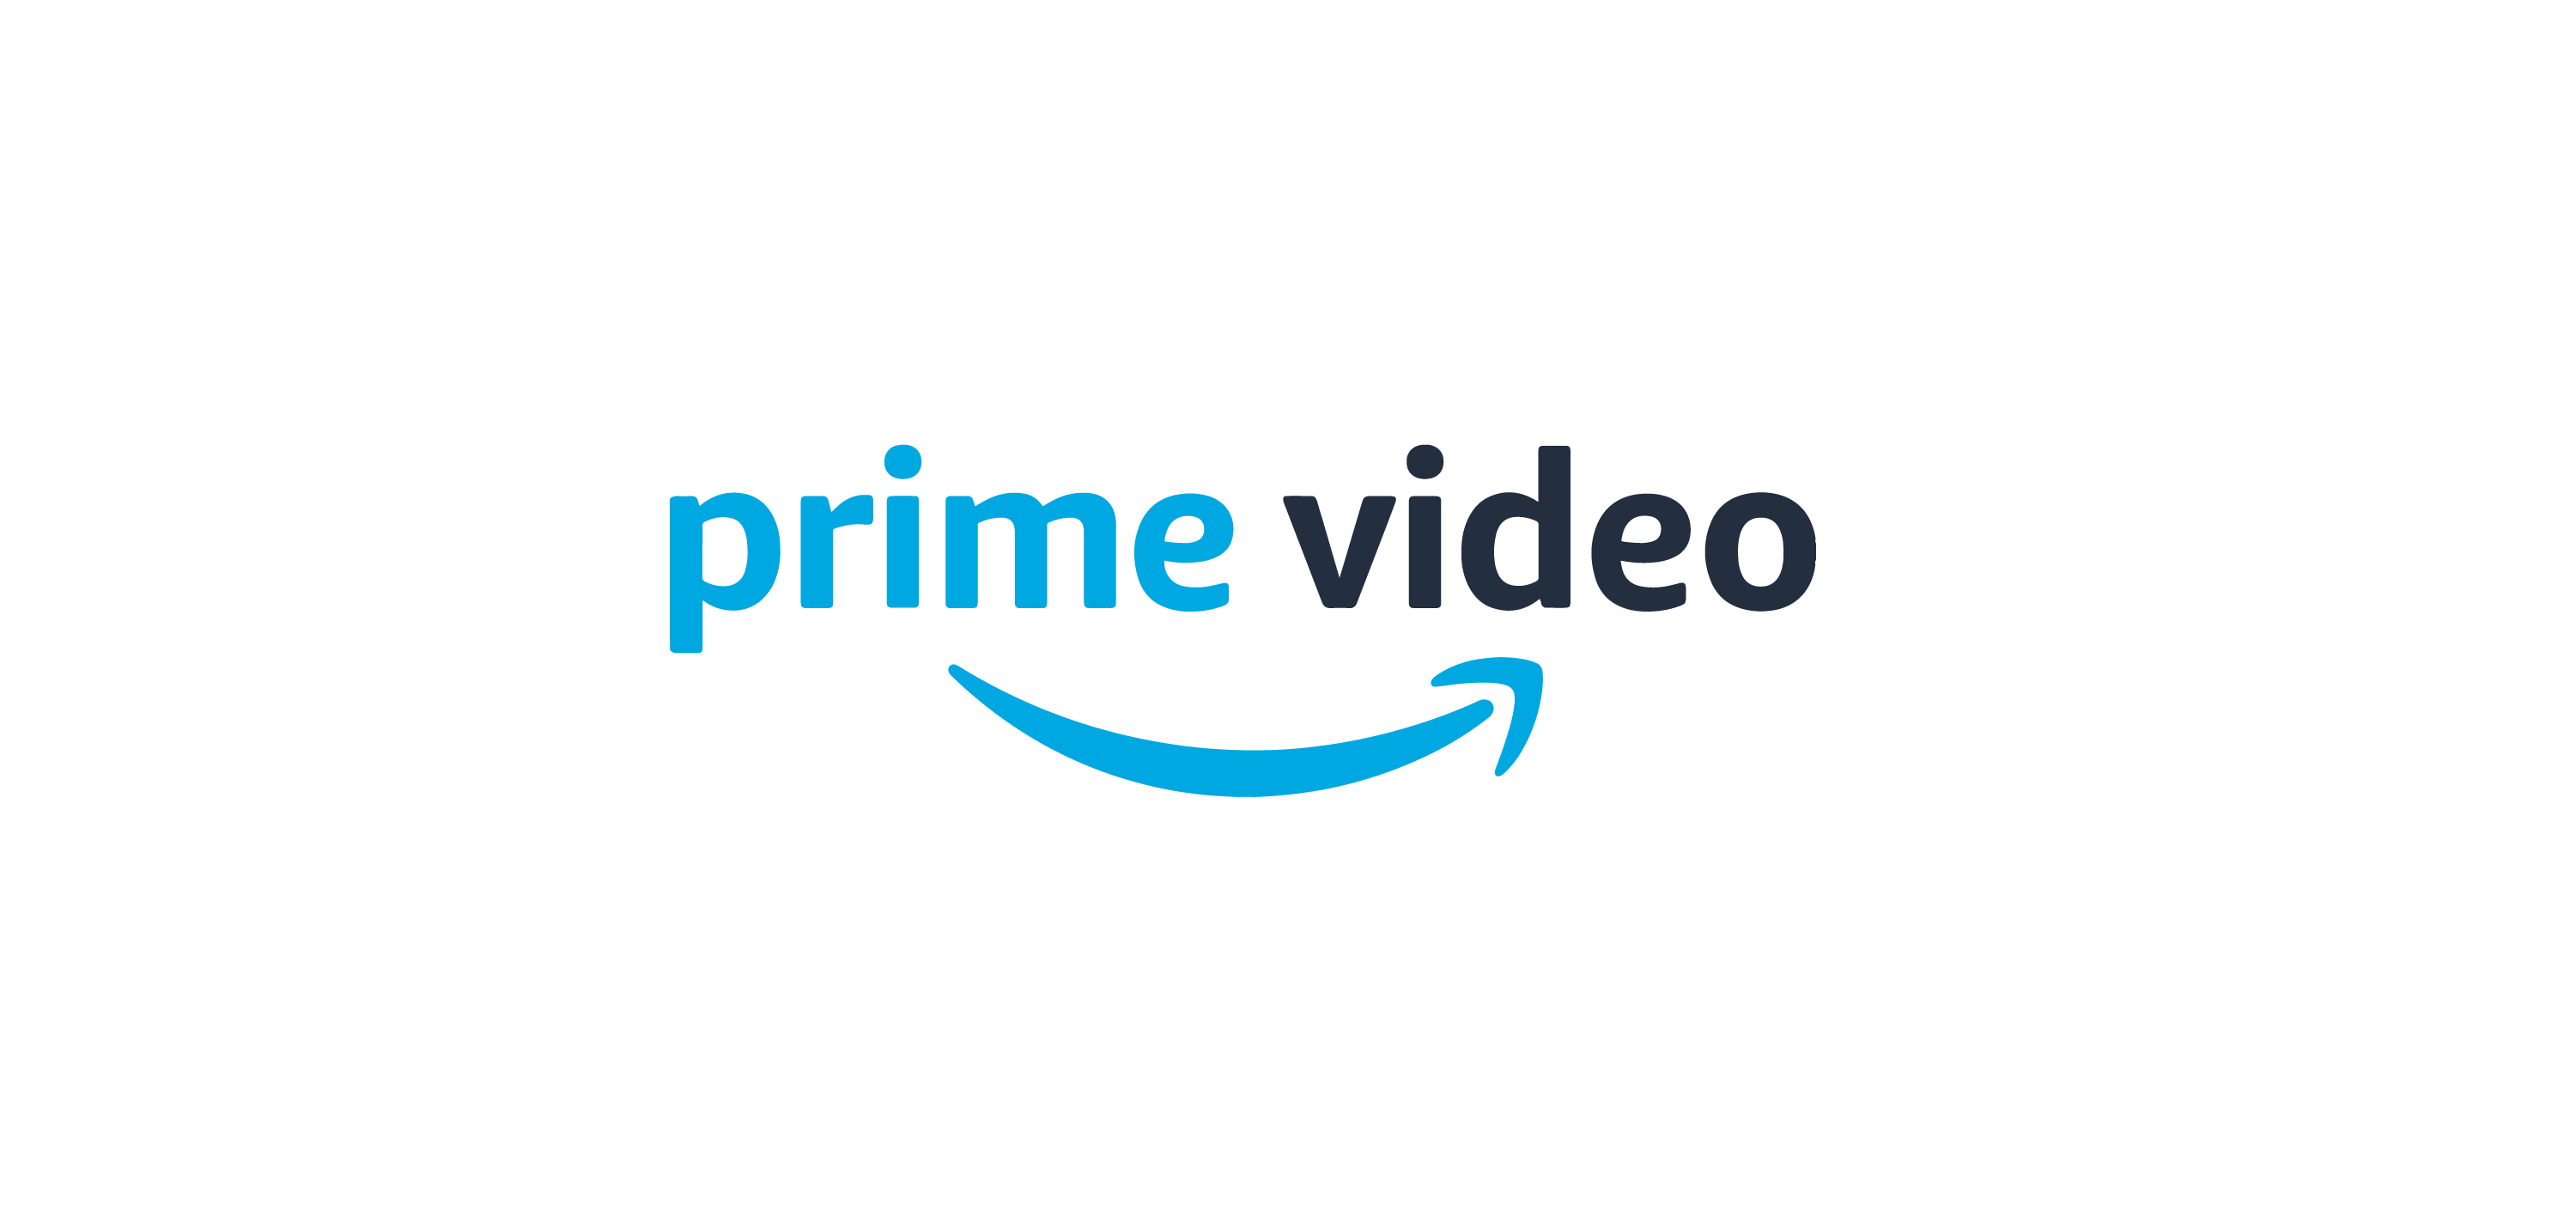

<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0; color:white' role="tab" aria-controls="home"><center>Classificazione multi-label - Amazon Prime TV Shows and Movies</center></h2>
    


Si vuole mostrare l'implementazione di un **classificatore multi-label** che sia in grado di associare uno o più generi ad un determinato film o serie, utilizzando le rispettive **descrizioni**.

In primis, si eseguirà un processo di **Data Cleaning** per testare la qualità dei dati e, qualora fosse necessario, modificarli in modo da evitare errori e renderli migliori.

In un secondo momento, dopo aver effettuato una breve **analisi**, si testeranno diversi classificatori e tra questi verrà effettuato un **confronto**.

In generale si effettueranno i seguenti passaggi:
   
* [**Presentazione del dataset**](#1)
* [**Data Cleaning**](#2)
* [**Text Processing (NLP)**](#3)
* [**Analisi**](#4)
* [**Implementazione e confronto  dei classificatori**](#5)
* [**Conclusione e considerazioni finali**](#6)

<a id="1"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0; color:white' role="tab" aria-controls="home"><center>1. Presentazione del dataset</center></h2>
 

I dati estratti presenti nel database sono stati collezionati dal sito [JustWatch](https://www.justwatch.com/us). Sono presenti informazioni per quanto riguarda la tipologia di prodotto (movie o show), il suo titolo, anno di rilascio, la descrizione del contenuto e altro.

Per maggiori informazioni: [info](https://www.kaggle.com/datasets/victorsoeiro/amazon-prime-tv-shows-and-movies)

In [1]:
import pandas as pd
import csv

df = pd.read_csv("amazonPrime.csv")
df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,NaN,93,['drama'],['US'],NaN,tt7672388,5.3,20.0,1.406,NaN
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,NaN,55,['comedy'],['US'],NaN,tt15041600,NaN,NaN,0.600,NaN
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,NaN,116,['crime'],['IN'],NaN,NaN,NaN,NaN,1.960,NaN
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN


Il dataset contiene **9871 record** con **15 attributi**. Molti di questi attributi non saranno utili all'intento del progetto. Quindi, è necessario effettuare un processo di data cleaning.

<a id="2"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0; color:white' role="tab" aria-controls="home"><center>2. Data Cleaning</center></h2>
 

Si effettua la pulizia del dataset al fine di limitare il numero di possibili errori ed aumentare le prestazioni dei vari classificatori.

**2.1 - Eliminazione delle colonne non utili**

In [2]:
df = df.drop(['release_year', 'age_certification', 'runtime', 'production_countries', 'seasons', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'imdb_id', 'imdb_score'], axis=1)
df

,id,title,type,description,genres
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,"['comedy', 'family', 'animation', 'action', 'f..."
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...","['action', 'drama', 'war', 'western', 'comedy'..."
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,"['romance', 'war', 'drama']"
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...","['comedy', 'drama', 'romance']"
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,"['thriller', 'drama', 'romance']"
...,...,...,...,...,...
9866,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,['drama']
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,['comedy']
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,['crime']
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...","['family', 'drama']"


**2.2 - Eliminazione dei duplicati**

In [3]:
df[ df.duplicated(['title'])]

,id,title,type,description,genres
472,tm99134,Little Men,MOVIE,The former Jo March and her husband Professor ...,"['romance', 'drama']"
480,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,['western']
720,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,"['drama', 'crime']"
722,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,"['drama', 'romance']"
904,tm111211,Custer's Last Stand,MOVIE,Kit Cardigan seeks the killer of his father......,"['western', 'history', 'romance', 'war']"
...,...,...,...,...,...
9373,tm1133705,Bali,MOVIE,This movie is about the life of a middle class...,"['thriller', 'horror']"
9449,tm1069739,Mind Games,MOVIE,An Army psychologist held captive by an unknow...,['thriller']
9550,ts296284,Truth or Dare,SHOW,A story that follows two couples who mistakenl...,['comedy']
9761,tm1102439,Udanpirappe,MOVIE,A woman hopes for the reunion of two families ...,['drama']


Sono presenti 134 duplicati.

In [4]:
df = df.drop_duplicates(['title'])
df.count()

id             9737
title          9737
type           9737
description    9621
genres         9737
dtype: int64

Dopo l'eliminazione dei duplicati, il numero di record è passato da 9871 a 9737.

**2.3 - Eliminazione di righe contenenti valori NaN**

Si nota che il numero di "description" è minore rispetto al numero di "title", "id", "type" e "genres". Ciò suggerisce che potrebbero essere presenti delle righe prive di descrizione. Controllo: 

In [5]:
df[ df['description'].isna()]

,id,title,type,description,genres
672,tm582037,Ye Shang Hai,MOVIE,NaN,['drama']
1661,tm544335,Dhonni Meye,MOVIE,NaN,['drama']
1683,tm759691,Uyarntha Manithan,MOVIE,NaN,['drama']
1785,tm688794,Mitzi's 2nd Special,MOVIE,NaN,[]
1804,tm526015,Veera Thirumagan,MOVIE,NaN,[]
...,...,...,...,...,...
9794,tm1084026,Leighann Lord: I Mean Business,MOVIE,NaN,['comedy']
9800,ts344471,Day Ones,SHOW,NaN,['drama']
9816,tm1060910,Erik Terrell: Live at the Helium Comedy Club,MOVIE,NaN,['comedy']
9827,tm1099582,Hero 115,MOVIE,NaN,['drama']


<!-- Sono effettivamente presenti dei valori NaN. Quindi, rimuovo le righe in corrispondenza di questi. -->

Sono effettivamente presenti dei valori NaN in corrispondenza della colonna "description". Di conseguenza, rimuovo i record che li contengono:

In [6]:
df = df.dropna(subset=['description'])
df.count()

id             9621
title          9621
type           9621
description    9621
genres         9621
dtype: int64

**2.4 - Eliminazione di righe senza genere**

In [7]:
df[ df['genres'] == '[]']

,id,title,type,description,genres
79,tm348419,Payoff in the Pacific,MOVIE,A documentary on .S. efforts against the Japan...,[]
379,tm18966,D-Day: The Normandy Invasion,MOVIE,Focusing on both the strategic overview of the...,[]
382,tm83465,Sunny,MOVIE,Sunny is a 1941 film American film directed by...,[]
581,tm406498,Nam Iruvar,MOVIE,Sukumar is misled into investing all his savin...,[]
640,tm1733,Adventure in Iraq,MOVIE,Five Allied soldiers in an airplane flying to ...,[]
...,...,...,...,...,...
9838,tm1123214,Taller Than the Trees,MOVIE,A man embarks on a journey deep into the wilde...,[]
9857,tm1022309,The Struggle II: The Dilemma,MOVIE,"In The Struggle II, Darnell (played by Ronrico...",[]
9860,tm1090675,Burning Man: The Musical,MOVIE,Follow Molly whose billionaire boss plans to d...,[]
9861,tm1142918,Ty Barnett: Yep,MOVIE,"Ty Barnett, a Chicago native, got his start at...",[]


In [8]:
df = df.drop(df[ df['genres'] == '[]'].index, axis=0)

**2.5 - Ulteriore pulizia**

In [9]:
df.drop(['title', 'id', 'type'], axis=1, inplace=True)

**2.6 - Caricamento del database pulito su un file csv**

In [10]:
df.to_csv('primeVideo_cleaned.csv')
primeVideo = pd.read_csv('primeVideo_cleaned.csv')
primeVideo.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
primeVideo

,description,genres
0,The Three Stooges were an American vaudeville ...,"['comedy', 'family', 'animation', 'action', 'f..."
1,"During America’s Civil War, Union spies steal ...","['action', 'drama', 'war', 'western', 'comedy'..."
2,It's the hope that sustains the spirit of ever...,"['romance', 'war', 'drama']"
3,"Hildy, the journalist former wife of newspaper...","['comedy', 'drama', 'romance']"
4,An aspiring actress begins to suspect that her...,"['thriller', 'drama', 'romance']"
...,...,...
9429,Dallas and heroin have one thing in common: Du...,['drama']
9430,Something From Nothing takes you on a stand-up...,['comedy']
9431,A cop from Chennai sets out to nab a dreaded d...,['crime']
9432,"This story is about prevalent caste problem, e...","['family', 'drama']"


A seguito della fase di pulizia, sono presenti **9434 record** e **2 attributi**.

<a id="3"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0; color:white' role="tab" aria-controls="home"><center>3. Text Processing (NLP)</center></h2>
 
    
Prima di procedere, è necessario pre-processare il testo, ovvero applicare delle procedure che permettano di convertire il testo da **linguaggio naturale** a una forma tale da poter essere utilizzata dalla **macchina** per poter effettuare la classificazione.

In [12]:
import spacy as sp
from spacy.lang.en.stop_words import STOP_WORDS

nlp = sp.load('en_core_web_sm')
# pd.set_option('mode.chained_assignment', None)

*"en_core_web_sm"* è un modello pre-addestrato per l'inglese che include un'ampia gamma di funzionalità linguistiche, come il riconoscimento delle parti del discorso (POS), l'analisi grammaticale, la lemmatizzazione, il riconoscimento delle entità nominate e altro ancora.

**3.1 - Conversione da upper-case a lower-case.**

In [13]:
primeVideo['description'] = primeVideo.apply(lambda x: x['description'].lower(), axis=1)

**3.2 - Rimozione Stop-words e punteggiatura**

In [14]:
def rmv_stop_and_punct(text):
    txt = ''
    doc = nlp(text)
    
    for i in doc:
        if not (i.is_stop or i.is_punct):
            txt = txt + str(i) + ' '
    return txt

for i in range(primeVideo.shape[0]):
    primeVideo.loc[i, 'description'] = rmv_stop_and_punct(primeVideo.loc[i, 'description'])


**3.3 - Lemmatisation**

In [15]:
def lemmatisation(text):
    txt = ''
    doc = nlp(text)
    
    for i in doc:
        txt = txt + i.lemma_ + ' '
    return txt

for i in range(primeVideo.shape[0]):
    primeVideo.loc[i, 'description'] = lemmatisation(primeVideo.loc[i, 'description'])


**3.4 - Rimozione numeri**

In [16]:
import re

def rmv_number(text):
    text = re.sub('[0-9]', '', text)
    return text

for i in range(primeVideo.shape[0]):
    primeVideo.loc[i, 'description'] = rmv_number(primeVideo.loc[i, 'description'])


*Esempio descrizione post elaborazione:*

In [17]:
primeVideo['description'][0]

'stooge american vaudeville comedy team active   well know  short subject film columbia picture regularly air television  hallmark physical farce slapstick film stooge commonly know actual name total stooge act run active give time moe howard larry fine mainstay ensemble nearly year run '

In [18]:
primeVideo.head()

,description,genres
0,stooge american vaudeville comedy team active ...,"['comedy', 'family', 'animation', 'action', 'f..."
1,america civil war union spy steal engineer joh...,"['action', 'drama', 'war', 'western', 'comedy'..."
2,hope sustains spirit gi dream day finally retu...,"['romance', 'war', 'drama']"
3,hildy journalist wife newspaper editor walter ...,"['comedy', 'drama', 'romance']"
4,aspire actress begin suspect temperamental boy...,"['thriller', 'drama', 'romance']"


<a id="4"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0; color:white' role="tab" aria-controls="home"><center>4. Analisi</center></h2>
 
    
Il processo di analisi aiuta a comprendere meglio le **caratteristiche dei dati** e come questi sono "distribuiti" all'interno del dataset; la conoscenza di queste informazioni è utile per determinare l'approccio al dataset in fase di implementazione e interpretazione dei risultati dei vari algoritmi di machine learning.
    
Verrà utilizzata la libreria **'scikit-learn'**, la quale possiede diversi tool per l'analisi predittiva dei dati e machine learning. In questo caso, sarà utilizzato **'MultiLabelBinarizer'**, ovvero un tool utile a gestire la codifica di variabili categoriche multilabel in un formato binario (se un record appartiene a una determinata categoria, il valore nella categoria corrispondente sarà 1; altrimenti sarà 0). 

Prima di iniziare il processo di creazione dei vettori di feature, è necessario convertire i generi da **stringhe** del tipo **" ['action', 'animation', 'comedy'] "** a **liste** del tipo **['action', 'animation', 'comedy']**, dove ogni elemento della lista è una stringa:

In [19]:
import re

tmp = []
for i in range(primeVideo.shape[0]):
    tmp.append(re.findall(r'\b[a-z]+\b', primeVideo.loc[i, 'genres']))

serie = pd.Series(tmp)
primeVideo['genres'] = serie

In [20]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(primeVideo.genres) 
dt = pd.concat([primeVideo['description'], pd.DataFrame(labels)], axis=1)
dt.columns = ['description'] + list(mlb.classes_)

Ciascun **vettore di feature** contiene la **presenza/assenza (1/0)** del genere identificato dalla j-esima colonna in riferimento a un determinato film o serie tv, identificato dall'i-esimo indice di riga:

In [21]:
labels

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Etichette.

In [22]:
mlb.classes_

array(['action', 'animation', 'comedy', 'crime', 'documentation', 'drama',
       'european', 'family', 'fantasy', 'history', 'horror', 'music',
       'reality', 'romance', 'scifi', 'sport', 'thriller', 'war',
       'western'], dtype=object)

In [23]:
dt.head(3)

,description,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western
0,stooge american vaudeville comedy team active ...,1,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
1,america civil war union spy steal engineer joh...,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1
2,hope sustains spirit gi dream day finally retu...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


<Axes: >

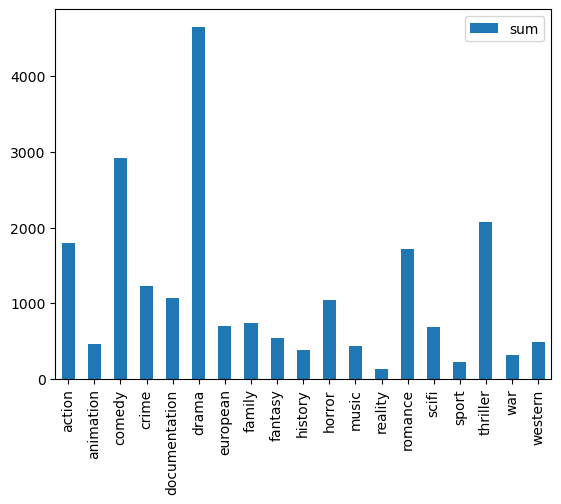

In [24]:
import numpy as np
import matplotlib.pyplot as plt

sums=dt.iloc[:, 1:].sum()
sums=sums.to_frame()
sums=sums.rename(columns = {0:'sum'})
sums.plot.bar()


Il grafico ci da una panoramica della quantità di film e serie tv per genere. Il genere che sicuramente salta all'occhio per il grande numero di film e serie tv cui vi appartengono è il "drama", seguito da "comedy". Il genere meno prodotto è "reality".

Importiamo il database ricavato in un file csv:

In [25]:
import pandas as pd

dt.to_csv('final_dataset.csv')
dt = pd.read_csv('final_dataset.csv')
dt.drop('Unnamed: 0', axis=1, inplace=True)
dt.head()

,description,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western
0,stooge american vaudeville comedy team active ...,1,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
1,america civil war union spy steal engineer joh...,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1
2,hope sustains spirit gi dream day finally retu...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,hildy journalist wife newspaper editor walter ...,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,aspire actress begin suspect temperamental boy...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


<a id="5"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0; color:white' role="tab" aria-controls="home"><center>5. Implementazione e confronto  dei classificatori</center></h2>

    
Prima di iniziare con l'applicazione vera e propria dei classificatori, dividiamo il dataset in **training-set** e **test-set**. Il primo viene utilizzato per ottimizzare i parametri da utilizzare negli algoritmi di machine learning; il secondo per valutare la performance dell'algoritmo di ML.

Estraggo i **generi**, ovvero le **ground-truth labels** che andrò ad includere nel test-set e training-set.

In [26]:
from sklearn.model_selection import train_test_split

y = dt.iloc[:, 1:]
y.head()

,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western
0,1,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


Dato che le **descrizioni** sono **testuali**, utilizziamo **TF-IDF (Term Frequency-Inverse Document Frequency)**.

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dt['description'])
print(X)

  (0, 24968)	0.06713146967376894
  (0, 15297)	0.12978855677675746
  (0, 7105)	0.1514636867106354
  (0, 13493)	0.1858214963054148
  (0, 7931)	0.13788870281986643
  (0, 12602)	0.14072419257335764
  (0, 10320)	0.1591541451508724
  (0, 14653)	0.17533697025982464
  (0, 22617)	0.07565467811334498
  (0, 8892)	0.09911713859105624
  (0, 19242)	0.17592568455780394
  (0, 185)	0.11512053370158458
  (0, 22787)	0.14793651733842256
  (0, 15141)	0.09640149652207439
  (0, 197)	0.14230379234820587
  (0, 4406)	0.1684309895017232
  (0, 20706)	0.17533697025982464
  (0, 7664)	0.1715948809402128
  (0, 16850)	0.13370990197322055
  (0, 9500)	0.1858214963054148
  (0, 22293)	0.10190077964427458
  (0, 427)	0.10608327962897425
  (0, 18424)	0.16569030207583738
  (0, 16873)	0.1293471490667866
  (0, 4337)	0.15278831839379606
  :	:
  (9432, 17484)	0.2218387826789029
  (9432, 24062)	0.2167161566843045
  (9432, 21482)	0.1437246091144903
  (9432, 7637)	0.14553900062243436
  (9433, 874)	0.31241536640960804
  (9433, 7766)	

Il risultato è una **matrice sparsa**.

Ogni "riga" della matrice è costituita da una coppia di valori + una percentuale.
* **coppia di valori (a, b):** **"a"** identifica in maniera univoca il documento, che in questo caso è la descrizione; **"b"** identifica in maniera univoca un termine appartenente al vocabolario e contenuto nella descrizione. Ciò vuol dire che descrizioni diverse possono presentare termini identici.
* **percentuale:** indica il **valore TF-IDF** calcolato per quel determinato termine contenuto all'interno di quel determinato documento. In particolare si avrà:

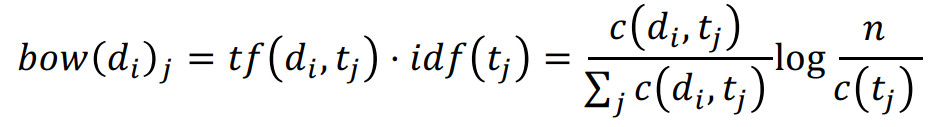

Dove **"BOW"** sta per **"Bag Of Words"**.

"**TF-IDF** permette di assegnare un certo **grado di importanza** ad un termine all'interno di un documento sulla base di due aspetti:
* il termine compare **frequentemente** in quel **documento (TF)**.
* il termine è **raro** in tutta la **raccolta di documenti (IDF)**.

Quindi, una determinata descrizione sarà rappresentata come un **vettore di percentuali** avente **stessa dimensione del vocabolario**.

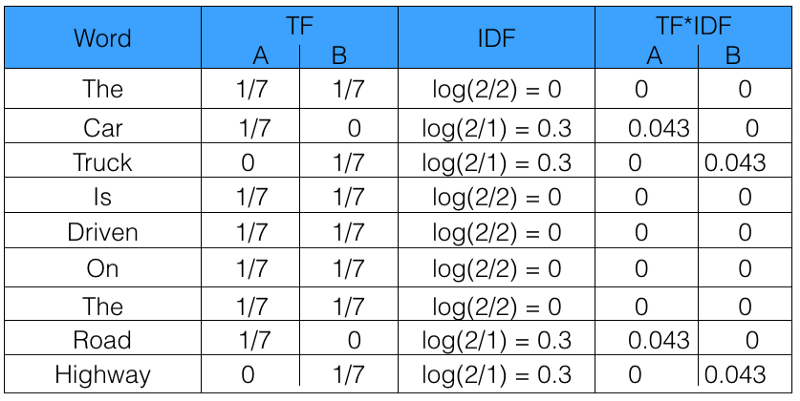

In [28]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20)

I quattro valori soprastanti sono quattro matrici sparse derivanti dallo splitting eseguito su X e y. X e y sono correlate in quanto: 
* X contiene i valori del vettore di feature calcolato con TF-IDF sull'i-esimo documento. 
* y contiene i generi associati all'i-esimo documento.

**5.1 - Differenti approcci nella classificazione MultiLabel**

"Binary relevance," "classifier chains," e "label powerset" sono tre approcci comuni utilizzati nella classificazione multiclasse e nella classificazione multietichetta in machine learning. Ognuno di questi approcci **gestisce la previsione di più classi o etichette**, ma utilizza strategie diverse per farlo.

1. **Binary Relevance (BR)**:
   - In questo approccio, ogni classe o etichetta è considerata in modo indipendente, come se fosse una classificazione binaria separata.
   - Per ogni classe, viene addestrato un classificatore binario (ad esempio, un classificatore logistico o un classificatore basato su alberi decisionali) che prevede se un campione appartiene o meno a quella classe specifica. Il problema principale, quindi, viene trasformato in più problemi di classificazione singola.
   - Gli output di tutti i classificatori binari sono quindi combinati per ottenere le previsioni finali per tutte le classi.

2. **Classifier Chains (CC)**:
   - In questo approccio, invece di considerare le classi come indipendenti, si costruisce una catena di classificatori binari in cui l'output di un classificatore binario diventa l'input per il successivo.
   - Ad esempio, se ci sono K classi, vengono addestrati K classificatori binari, ognuno dei quali prende in input i risultati dei classificatori binari precedenti e prevede la probabilità di appartenenza alla sua classe specifica.
   - L'ordine in cui vengono concatenati i classificatori binari può influenzare le prestazioni del modello.

3. **Label Powerset (LP)**:
   - Questo approccio rappresenta tutte le possibili combinazioni di etichette come una singola classe distinta.
   - Ad esempio, se ci sono K classi, ci sono 2^K possibili combinazioni di etichette uniche, e ognuna di queste combinazioni rappresenta una classe nel problema di classificazione.
   - Viene addestrato un classificatore per prevedere la combinazione di etichette specifica per ciascun campione.
   - Questo approccio è utile quando le relazioni tra le etichette sono complesse e non possono essere modellate facilmente dalle altre due strategie.

Ognuno di questi approcci ha vantaggi e svantaggi, e la scelta tra di essi dipende dalla natura del problema di classificazione multiclasse o multietichetta che si sta affrontando, così come dalle caratteristiche dei dati e dalle prestazioni desiderate del modello. Spesso, è utile eseguire esperimenti con diversi approcci per determinare quale funziona meglio per un problema specifico.

    


In [29]:
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

import time

**5.2 - Metriche**

A causa della natura sparsa del dataset, è necessario scegliere delle metriche di valutazione adatte. Ad esempio,con i dati presi in considerazione potrebbe non essere conveniente usare l'accuratezza, proprio a causa della poca densità dei dati.
Le metriche utilizzate, dunque, sono le seguenti:
    
- **Macro F1**: Il punteggio F1 macro viene calcolato utilizzando la media aritmetica di tutti i punteggi F1 per classe.


- **Micro F1**: La micro media calcola un punteggio F1 medio globale contando le somme dei veri positivi (TP), dei falsi negativi (FN) e dei falsi positivi (FP).


- **Hamming**: La perdita di Hamming viene utilizzata per determinare la frazione di previsioni errate di un determinato modello. *Minore è la perdita di hamming, migliore è il nostro modello nel fare previsioni.*


In [30]:
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss

###**Multinomial Naïve Bayes**

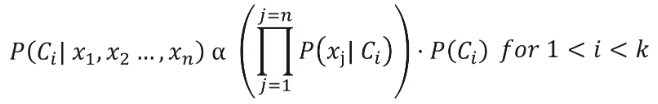

In [31]:
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt


print("MultinomialNB - BinaryRelevance", end='\n\n')

start = time.time()
classifier = BinaryRelevance(classifier=MultinomialNB(), require_dense=[False, True])
classifier.fit(Xtrain, ytrain)
predictions = classifier.predict(Xtest)

macro_f1 = f1_score(ytest, predictions, average='macro')
micro_f1 = f1_score(ytest, predictions, average='micro')
hamLoss = hamming_loss(ytest, predictions)

print('Macro F1 ->', round((macro_f1)*100, 2), '%')
print('Micro F1 ->', round((micro_f1)*100, 2), '%')
print('Hamming ->', round((hamLoss)*100, 2), '%')

print('training time taken: ', round(time.time()-start, 0), 'seconds')
print('prediction time taken: ', round(time.time()-start, 0), 'seconds')


print(end='\n\n')


print("MultinomialNB - ClassifierChain", end='\n\n')

start = time.time()
classifier = ClassifierChain(classifier=MultinomialNB(), require_dense=[False, True])
classifier.fit(Xtrain, ytrain)
predictions = classifier.predict(Xtest)

macro_f1 = f1_score(ytest, predictions, average='macro')
micro_f1 = f1_score(ytest, predictions, average='micro')
hamLoss = hamming_loss(ytest, predictions)

print('Macro F1 ->', round((macro_f1)*100, 2), '%')
print('Micro F1 ->', round((micro_f1)*100, 2), '%')
print('Hamming ->', round((hamLoss)*100, 2), '%')

print('training time taken: ', round(time.time()-start, 0), 'seconds')
print('prediction time taken: ', round(time.time()-start, 0), 'seconds')


print(end='\n\n')

print("MultinomialNB - LabelPowerset", end='\n\n')
start = time.time()
classifier = LabelPowerset(classifier=MultinomialNB(), require_dense=[False, True])
classifier.fit(Xtrain, ytrain)
predictions = classifier.predict(Xtest)

macro_f1 = f1_score(ytest, predictions, average='macro')
micro_f1 = f1_score(ytest, predictions, average='micro')
hamLoss = hamming_loss(ytest, predictions)

print('Macro F1 ->', round((macro_f1)*100, 2), '%')
print('Micro F1 ->', round((micro_f1)*100, 2), '%')
print('Hamming ->', round((hamLoss)*100, 2), '%')

print('training time taken: ', round(time.time()-start, 0), 'seconds')
print('prediction time taken: ', round(time.time()-start, 0), 'seconds')


MultinomialNB - BinaryRelevance

Macro F1 -> 4.49 %
Micro F1 -> 27.07 %
Hamming -> 10.77 %
training time taken:  0.0 seconds
prediction time taken:  0.0 seconds


MultinomialNB - ClassifierChain

Macro F1 -> 4.63 %
Micro F1 -> 28.85 %
Hamming -> 10.76 %
training time taken:  0.0 seconds
prediction time taken:  0.0 seconds


MultinomialNB - LabelPowerset

Macro F1 -> 6.62 %
Micro F1 -> 34.71 %
Hamming -> 11.22 %
training time taken:  1.0 seconds
prediction time taken:  1.0 seconds


###**KNN Classifier**

In [32]:
from sklearn.neighbors import KNeighborsClassifier

print("KNeighborsClassifier - BinaryRelevance", end='\n\n')

start = time.time()
classifier = BinaryRelevance(classifier=KNeighborsClassifier(), require_dense=[False, True])
classifier.fit(Xtrain, ytrain)
predictions = classifier.predict(Xtest)

macro_f1 = f1_score(ytest, predictions, average='macro')
micro_f1 = f1_score(ytest, predictions, average='micro')
hamLoss = hamming_loss(ytest, predictions)

print('Macro F1 ->', round((macro_f1)*100, 2), '%')
print('Micro F1 ->', round((micro_f1)*100, 2), '%')
print('Hamming ->', round((hamLoss)*100, 2), '%')

print('training time taken: ', round(time.time()-start, 0), 'seconds')
print('prediction time taken: ', round(time.time()-start, 0), 'seconds')


print(end='\n\n')


print("KNeighborsClassifier - ClassifierChain", end='\n\n')

start = time.time()
classifier = ClassifierChain(classifier=KNeighborsClassifier(), require_dense=[False, True])
classifier.fit(Xtrain, ytrain)
predictions = classifier.predict(Xtest)

macro_f1 = f1_score(ytest, predictions, average='macro')
micro_f1 = f1_score(ytest, predictions, average='micro')
hamLoss = hamming_loss(ytest, predictions)

print('Macro F1 ->', round((macro_f1)*100, 2), '%')
print('Micro F1 ->', round((micro_f1)*100, 2), '%')
print('Hamming ->', round((hamLoss)*100, 2), '%')

print('training time taken: ', round(time.time()-start, 0), 'seconds')
print('prediction time taken: ', round(time.time()-start, 0), 'seconds')


print(end='\n\n')

print("KNeighborsClassifier - LabelPowerset", end='\n\n')
start = time.time()
classifier = LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[False, True])
classifier.fit(Xtrain, ytrain)
predictions = classifier.predict(Xtest)

macro_f1 = f1_score(ytest, predictions, average='macro')
micro_f1 = f1_score(ytest, predictions, average='micro')
hamLoss = hamming_loss(ytest, predictions)

print('Macro F1 ->', round((macro_f1)*100, 2), '%')
print('Micro F1 ->', round((micro_f1)*100, 2), '%')
print('Hamming ->', round((hamLoss)*100, 2), '%')

print('training time taken: ', round(time.time()-start, 0), 'seconds')
print('prediction time taken: ', round(time.time()-start, 0), 'seconds')


KNeighborsClassifier - BinaryRelevance

Macro F1 -> 27.5 %
Micro F1 -> 38.33 %
Hamming -> 11.25 %
training time taken:  52.0 seconds
prediction time taken:  52.0 seconds


KNeighborsClassifier - ClassifierChain

Macro F1 -> 29.42 %
Micro F1 -> 41.7 %
Hamming -> 11.45 %
training time taken:  62.0 seconds
prediction time taken:  62.0 seconds


KNeighborsClassifier - LabelPowerset

Macro F1 -> 25.0 %
Micro F1 -> 37.96 %
Hamming -> 12.89 %
training time taken:  3.0 seconds
prediction time taken:  3.0 seconds


###**Random Forest**
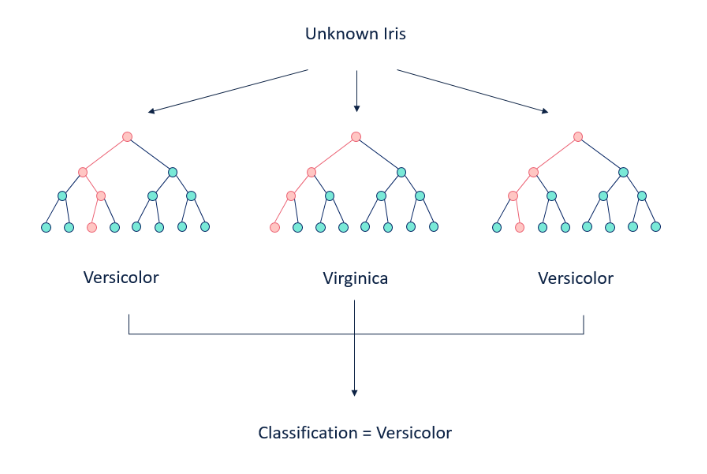

In [33]:
from sklearn.ensemble import RandomForestClassifier

print("RandomForestClassifier - BinaryRelevance", end='\n\n')

start = time.time()
classifier = BinaryRelevance(classifier=RandomForestClassifier(), require_dense=[False, True])
classifier.fit(Xtrain, ytrain)
predictions = classifier.predict(Xtest)

macro_f1 = f1_score(ytest, predictions, average='macro')
micro_f1 = f1_score(ytest, predictions, average='micro')
hamLoss = hamming_loss(ytest, predictions)

print('Macro F1 ->', round((macro_f1)*100, 2), '%')
print('Micro F1 ->', round((micro_f1)*100, 2), '%')
print('Hamming ->', round((hamLoss)*100, 2), '%')

print('training time taken: ', round(time.time()-start, 0), 'seconds')
print('prediction time taken: ', round(time.time()-start, 0), 'seconds')


print(end='\n\n')


print("RandomForestClassifier - ClassifierChain", end='\n\n')

start = time.time()
classifier = ClassifierChain(classifier=RandomForestClassifier(), require_dense=[False, True])
classifier.fit(Xtrain, ytrain)
predictions = classifier.predict(Xtest)

macro_f1 = f1_score(ytest, predictions, average='macro')
micro_f1 = f1_score(ytest, predictions, average='micro')
hamLoss = hamming_loss(ytest, predictions)

print('Macro F1 ->', round((macro_f1)*100, 2), '%')
print('Micro F1 ->', round((micro_f1)*100, 2), '%')
print('Hamming ->', round((hamLoss)*100, 2), '%')

print('training time taken: ', round(time.time()-start, 0), 'seconds')
print('prediction time taken: ', round(time.time()-start, 0), 'seconds')


print(end='\n\n')

print("RandomForestClassifier - LabelPowerset", end='\n\n')
start = time.time()
classifier = LabelPowerset(classifier=RandomForestClassifier(), require_dense=[False, True])
classifier.fit(Xtrain, ytrain)
predictions = classifier.predict(Xtest)

macro_f1 = f1_score(ytest, predictions, average='macro')
micro_f1 = f1_score(ytest, predictions, average='micro')
hamLoss = hamming_loss(ytest, predictions)

print('Macro F1 ->', round((macro_f1)*100, 2), '%')
print('Micro F1 ->', round((micro_f1)*100, 2), '%')
print('Hamming ->', round((hamLoss)*100, 2), '%')

print('training time taken: ', round(time.time()-start, 0), 'seconds')
print('prediction time taken: ', round(time.time()-start, 0), 'seconds')


RandomForestClassifier - BinaryRelevance

Macro F1 -> 15.45 %
Micro F1 -> 35.62 %
Hamming -> 10.2 %
training time taken:  905.0 seconds
prediction time taken:  905.0 seconds


RandomForestClassifier - ClassifierChain

Macro F1 -> 14.63 %
Micro F1 -> 37.16 %
Hamming -> 10.26 %
training time taken:  807.0 seconds
prediction time taken:  807.0 seconds


RandomForestClassifier - LabelPowerset

Macro F1 -> 23.6 %
Micro F1 -> 41.99 %
Hamming -> 10.77 %
training time taken:  181.0 seconds
prediction time taken:  181.0 seconds


<a id="6"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0; color:white' role="tab" aria-controls="home"><center>6. Conclusione e considerazioni finali</center></h2>

    
Tra tutti gli algoritmi testati, il classificatore che sicuramente ha prestazioni **migliori** per quanto riguarda la **tempistica** è il **Multinomial Naïve Bayes**, con un tempo di training e di predizione pari a **circa 0 secondi** per **ClassifierChain** e **BinaryRelevance**; pari a **circa 1 secondo** per **LabelPowerset**, anche se questo possiede una misura **Micro F1 più alta** rispetto agli altri approcci.
    
Il classificatore KNN sicuramente non può essere paragonato al Multinomial Naïve Bayes in termini di tempistica, ma ancor di più a **RandomForestClassifier**, il cui peggior tempo di classificazione è di **circa 800 secondi**. Nonostante questo, generalmente RandomForestClassifier da i risultati migliori.

Da ciò si evince che certi classificatori sono "avvantaggiati" per quanto riguarda la tempistica, ma non così fortunati nel risultato della classificazione; e viceversa. Per questo, è sempre bene **testare più classificatori** e scegliere quello che **meglio si adatta** a quel determinato dataset.